In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Movie_regression.csv" , header = 0)

In [16]:
%config IPCompleter.greedy=True

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [4]:
#to get a quick summary of the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [5]:
df.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000


# Treating Missing Values

In [6]:
#Time_takenn has missing values in it
#use mean values to replace
df['Time_taken'].mean()

157.39149797570855

In [7]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(),inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# Dummy Variable Creation

In [11]:
#convert all our categorical variables into numerical variable by using dummy variables
#dummy variable is 1 minus number of categories
df = pd.get_dummies(df,columns = ["3D_available","Genre"], drop_first= True)

In [17]:
df.head(10)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0
5,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,143.48,284.592,53,460,57400,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,1,0,0,1
7,22.8910,70.74,0.476,34285.460,169.6,6.980,7.075,6.875,7.170,7.96,400821,116.84,243.536,56,571,44200,0,0,1,0
8,24.2248,70.74,0.476,31280.205,173.5,6.910,7.075,6.850,7.000,7.96,295168,118.60,242.640,55,564,33000,1,1,0,0
9,23.4008,70.74,0.476,33352.220,159.4,6.665,6.725,6.575,6.855,7.96,412012,189.56,283.024,45,508,37800,1,0,0,1


# X-Y SPLIT

In [19]:
X = df.loc[:, df.columns!= 'Collection']
type(X)

pandas.core.frame.DataFrame

In [20]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [22]:
X.shape

(506, 19)

In [23]:
Y = df["Collection"]
type(Y)

pandas.core.series.Series

In [24]:
Y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

# Test and Train Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [27]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,1,0,0,0


# Training Regression Tree

In [32]:
#maxtree = number of layers in my tree
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [33]:
regtree.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3)

# PREDICTING VALUES USING TRAINED MODEL

In [37]:
Y_train_pred = regtree.predict(X_train)
Y_test_pred = regtree.predict(X_test)

In [38]:
Y_test_pred

array([ 46187.35632184, 100000.        ,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  23514.28571429,  23514.28571429,
        23514.28571429,  23514.28571429,  91860.86956522,  65183.33333333,
        46187.35632184,  65183.33333333,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        91860.86956522,  35137.77777778,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        23514.28571429, 100000.        ,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  35137.77777778,
        35137.77777778,  46187.35632184,  35137.77777778,  35137.77777778,
        46187.35632184,  

# Model Performance

In [39]:
#r2 = goodness of fit and it is between 1 and 0, 0.8 and above for excellent models
from sklearn.metrics import mean_squared_error,r2_score

In [42]:
#TO calculate the performance of different models on our same dataset
mean_squared_error(Y_test, Y_test_pred)

111364081.74002264

In [43]:
r2_score(Y_train,Y_train_pred)

0.8364651040556869

In [44]:
r2_score(Y_test,Y_test_pred)

0.6540678457568934

In [45]:
#r2 for train dataset is showing bigger than test data set because we have trained our model on our train dataset and it will always perform better on the dataset of which it was trained. 

# Plotting decision tree

In [47]:
#create a dot file and then convert to image
dot_data = tree.export_graphviz(regtree, out_file = None)

In [50]:
from IPython.display import Image

In [51]:
import pydotplus

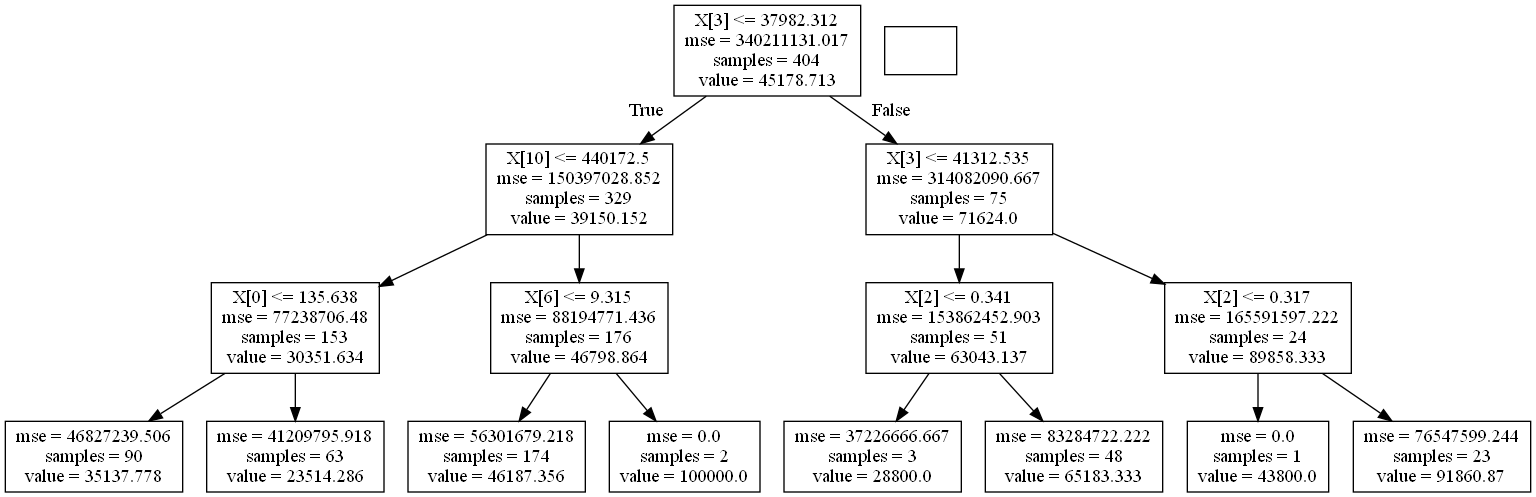

In [52]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [53]:
#X[3] REFERS TO THE fourth varaible of the X dataset, 37982.312 = the condition, if the budget is less than thirty seven thousand, then it will follow this branch and vice versa.
#the total number of observation is 404


# Controlling Tree growth

# # Maximum number of levels in tree

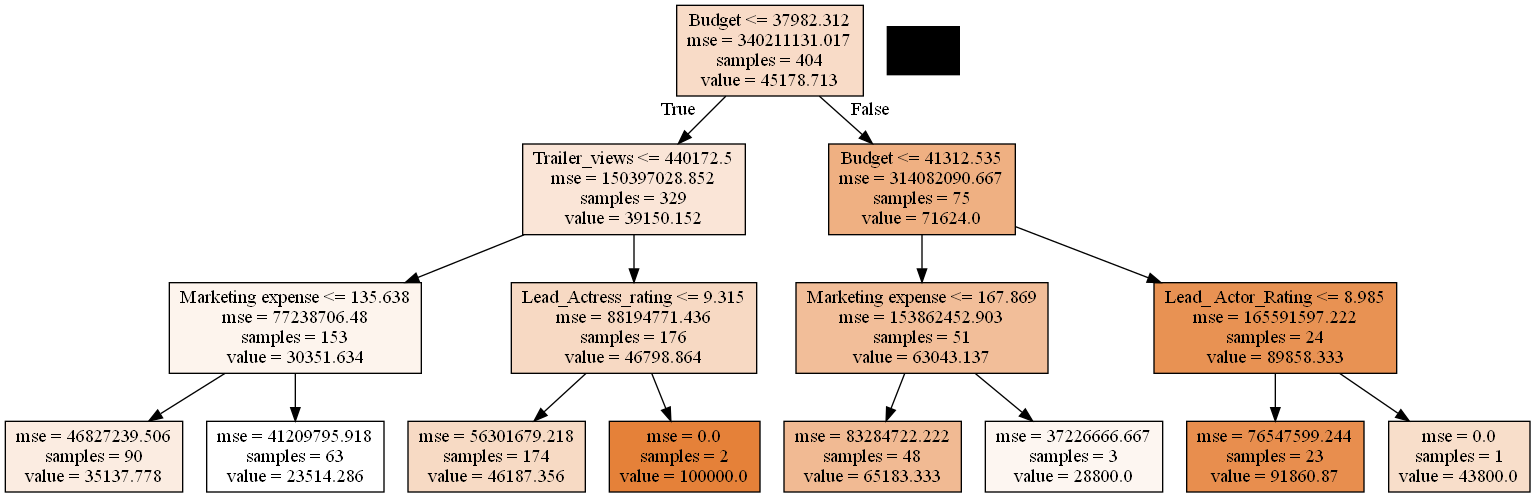

In [55]:
regtree1 = tree.DecisionTreeRegressor(max_depth = 3)
regtree1.fit(X_train,Y_train)
dot_data = tree.export_graphviz(regtree1, out_file = None, feature_names=X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

# Mininum observations at internal node

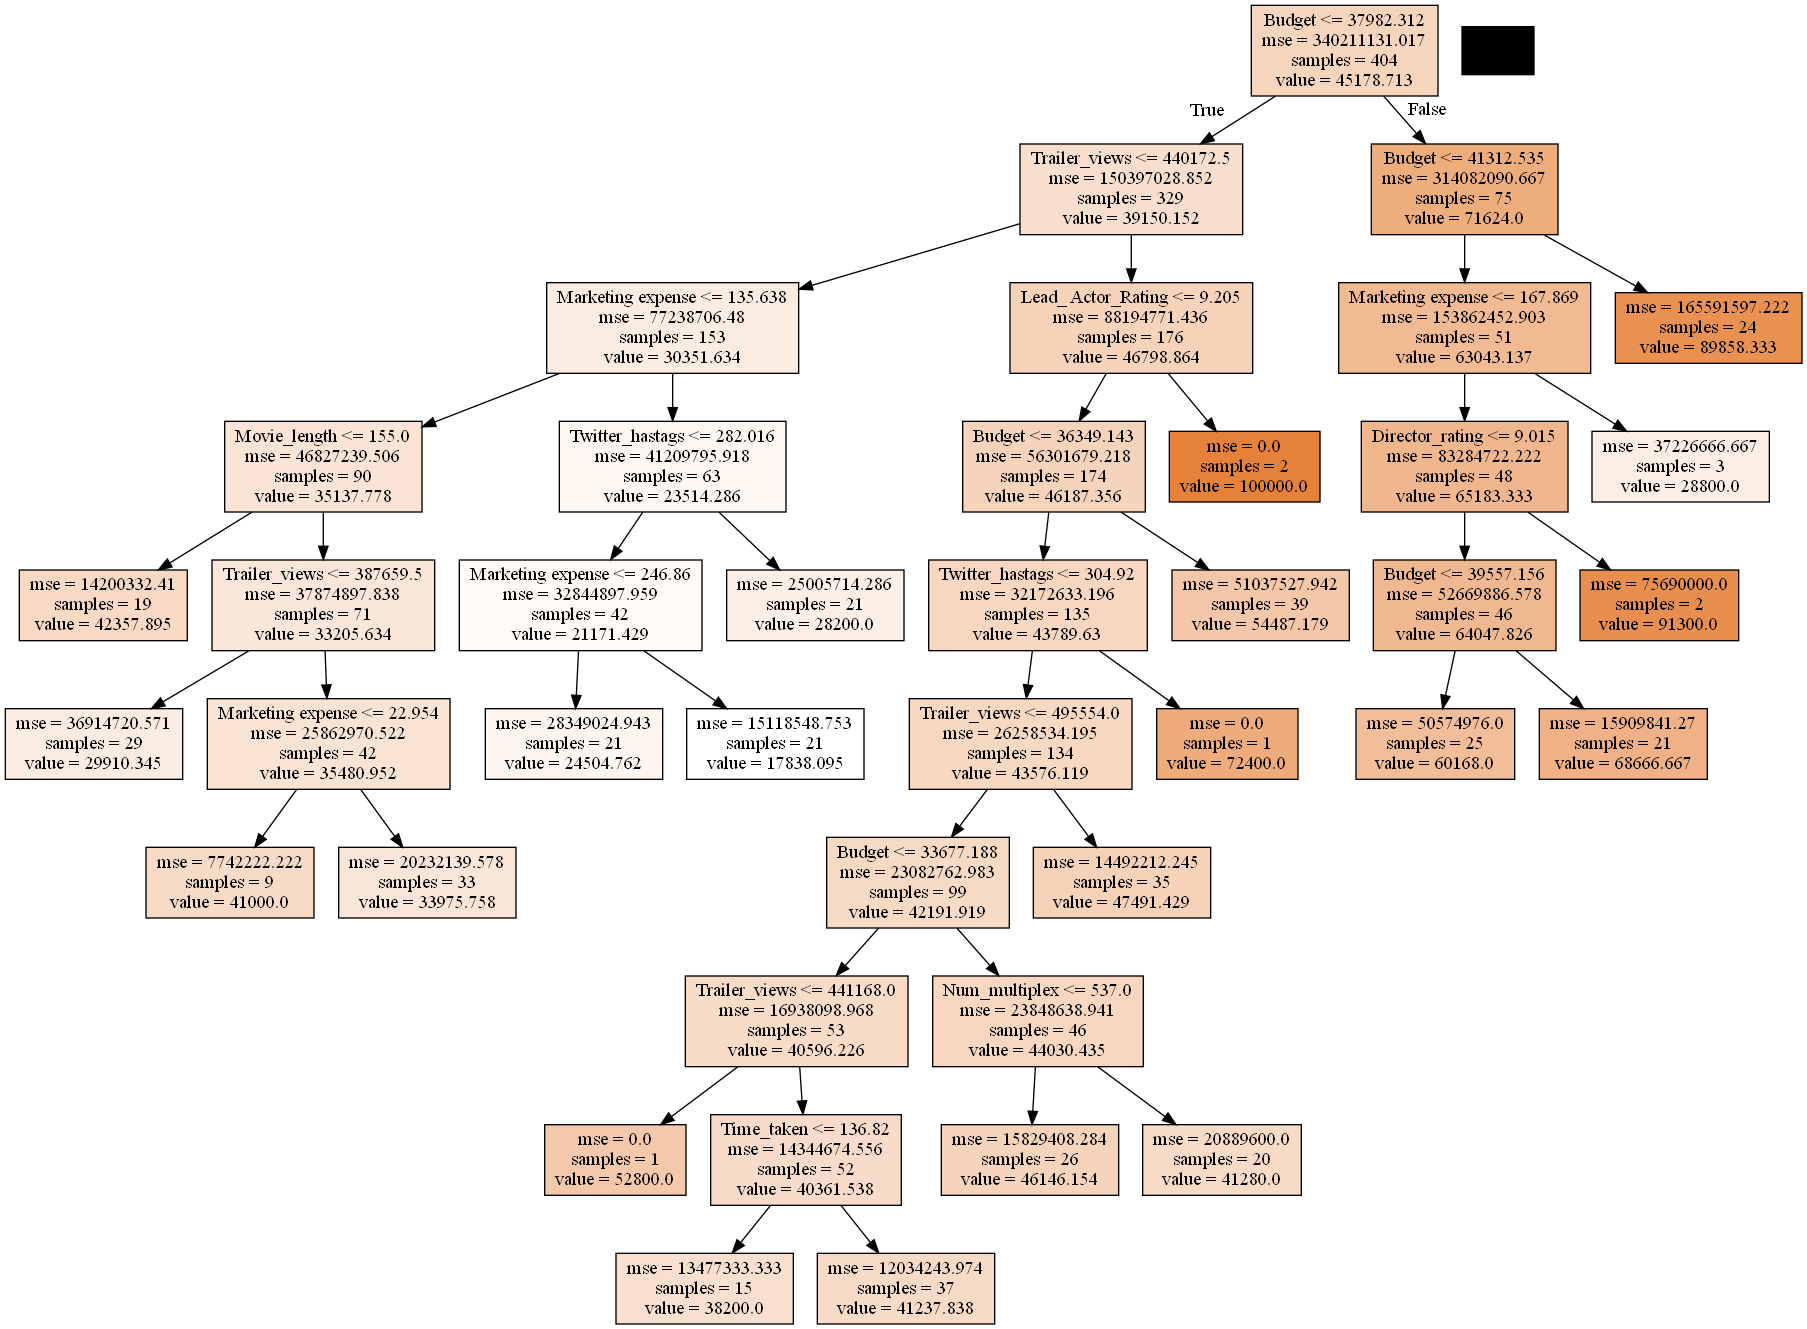

In [58]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 40)
regtree2.fit(X_train,Y_train)
dot_data = tree.export_graphviz(regtree2, out_file = None, feature_names=X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

# minimum observations at leaf node

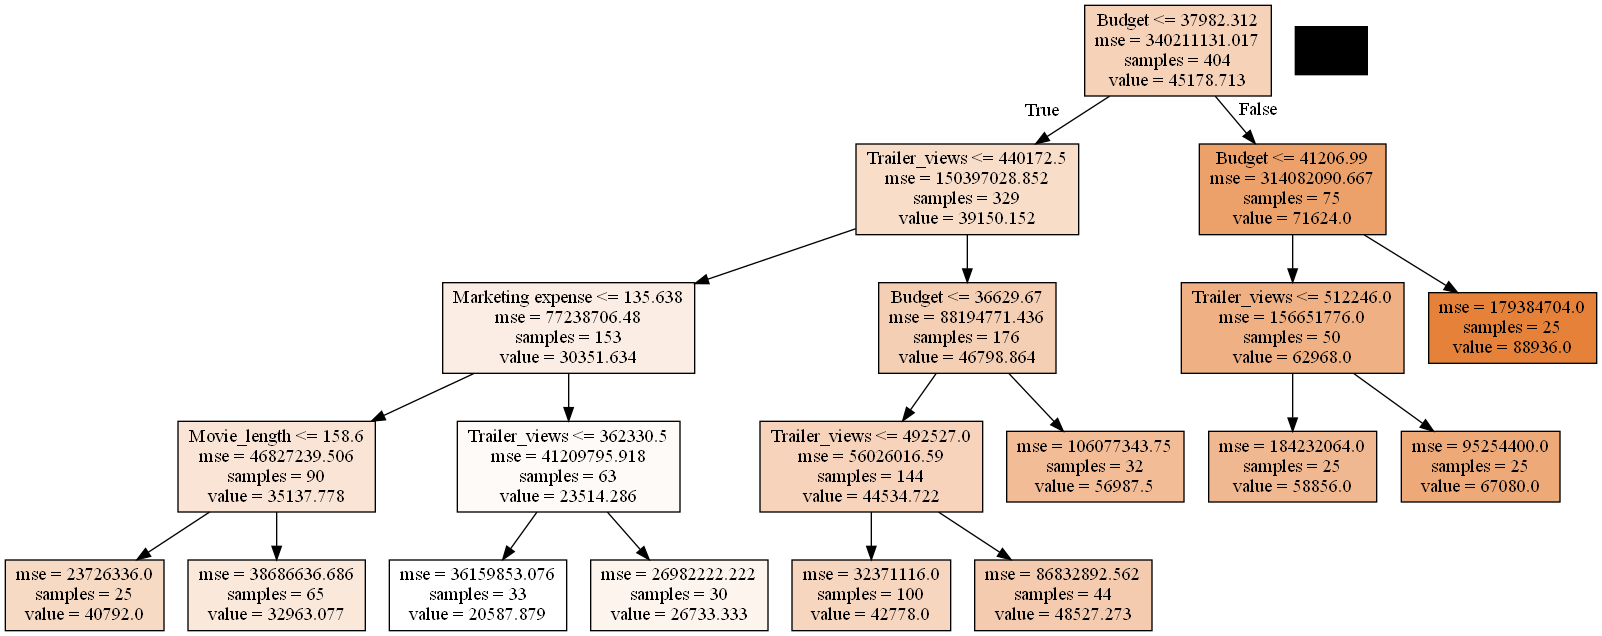

In [60]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 25, max_depth= 4)
regtree3.fit(X_train,Y_train)
dot_data = tree.export_graphviz(regtree3, out_file = None, feature_names=X_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())